## Sales Analysis
In this project, we will use Python Pandas & Python Matplotlib to analyze and answer business questions of about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

#### Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Merging 12 months of data together in a single file...

In [2]:
files = [file for file in os.listdir('P:\Python\projects\sales-analysis\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
# Merging it together
all_months_data = pd.concat(map(pd.read_csv,files))

In [4]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean up the data!!!

In [5]:
nan_df = all_months_data[all_months_data.isnull().any(axis=1)]
nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


#### Drop rows of NaN..

In [6]:
all_months_data = all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Augment data by adding additional columns..

#### Adding a 'Month' column..

In [7]:
all_months_data['Month'] = all_months_data['Order Date'].str[0:2]

In [8]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### find 'or' and delete it...

In [9]:
all_months_data[all_months_data['Month'].str[0:2] == 'Or'].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [10]:
all_months_data = all_months_data[all_months_data['Month'].str[0:2] != 'Or']

In [11]:
all_months_data.shape

(185950, 7)

#### Changing th data-type of Month column to int

In [12]:
all_months_data['Month'] = all_months_data['Month'].astype('int')

#### Convert every column to a correct data-type...

In [13]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [14]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])

#### Adding a 'Sales' Column

In [15]:
all_months_data['Sales'] = (all_months_data['Price Each']) * (all_months_data['Quantity Ordered'])

In [16]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Question 1 : What was the best month for sales? How much was earned that month?

In [17]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [18]:
all_months_data.groupby('Month').sum()['Sales'].nlargest(1)

Month
12    4.613443e+06
Name: Sales, dtype: float64

In [19]:
results = all_months_data.groupby('Month').sum()

In [20]:
months =[1,2,3,4,5,6,7,8,9,10,11,12]

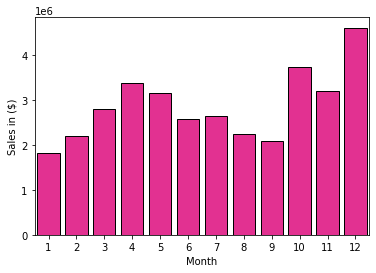

In [21]:
sns.barplot(months,results['Sales'],color='deeppink',edgecolor='black')
plt.ylabel('Sales in ($)')
plt.xlabel('Month');

#### Answer 1: The best month for sales was December.

#### Question 2 : Which city had the higest number of sales?

#### Firstly we will have to add a column named 'City'

In [22]:
# Defining some functions 
# Using apply and Lamda functions

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: get_city(x)+' '+get_state(x))

In [23]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [24]:
all_months_data.groupby('City').sum()['Sales'].nlargest(1)

City
 San Francisco CA    8.262204e+06
Name: Sales, dtype: float64

In [25]:
results = all_months_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


In [26]:
cities = [city for city, df in all_months_data.groupby('City')]

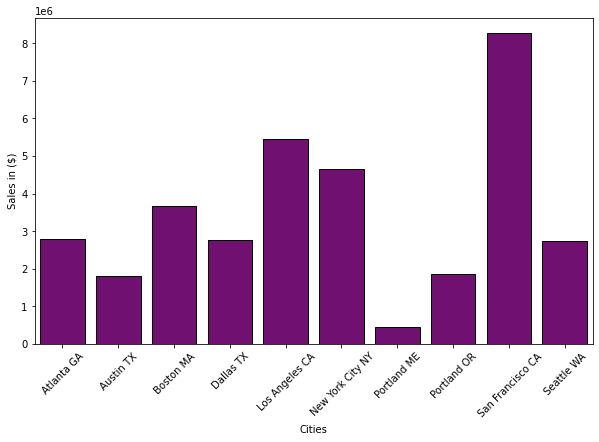

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(cities,results['Sales'],color='purple',edgecolor='black')
plt.ylabel('Sales in ($)')
plt.xlabel('Cities')
plt.xticks(rotation = 45);

#### Answer 2: The city with highest number of sales is : 'San Francisco CA'

#### Question 3 : What time should we run the advertisements to maximize likelihood of customer's buying product?

In [28]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

In [29]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [30]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

In [31]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [32]:
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute

In [33]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [34]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]

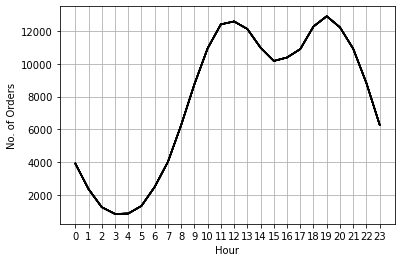

In [35]:
plt.plot(hours,all_months_data.groupby(['Hour']).count(),color='black')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.grid();

#### Answer 3:  After reading this graph. My recommendation is around 11 am (11) or 7 pm (19)

#### Question 4 : What products are most often sold together?

In [37]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

In [38]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38


In [39]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-39-9d66bca9fec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [40]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone,Wired Headphones"


In [42]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [44]:
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [66]:
# 1st way...
df.groupby('Grouped')['Order ID'].count().nlargest(5)

Grouped
iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Order ID, dtype: int64

In [72]:
# 2nd way..
df.loc[:,'Grouped'].value_counts()

iPhone,Lightning Charging Cable                                     882
Google Phone,USB-C Charging Cable                                   856
iPhone,Wired Headphones                                             361
Vareebadd Phone,USB-C Charging Cable                                312
Google Phone,Wired Headphones                                       303
                                                                   ... 
Google Phone,USB-C Charging Cable,27in FHD Monitor                    1
20in Monitor,iPhone                                                   1
LG Washing Machine,AA Batteries (4-pack)                              1
Google Phone,Bose SoundSport Headphones,Lightning Charging Cable      1
Vareebadd Phone,USB-C Charging Cable,Apple Airpods Headphones         1
Name: Grouped, Length: 366, dtype: int64

In [70]:
# 3rd Way (Complexed)
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Answer 4: The products that most often sold together are:
1. iPhone,Lightning Charging Cable                                     
2. Google Phone,USB-C Charging Cable                                   
3. iPhone,Wired Headphones                                             
4. Vareebadd Phone,USB-C Charging Cable                                
5. Google Phone,Wired Headphones                                   


#### Question 5 : What product was sold the most and why?

In [74]:
all_months_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30


In [77]:
product_group = all_months_data.groupby('Product')

In [85]:
quantity_ordered = product_group.sum()['Quantity Ordered']

In [86]:
products = [product for product, df in product_group]

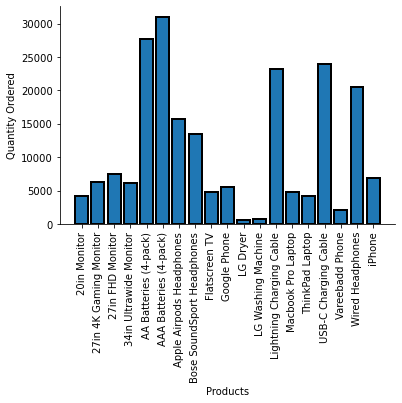

In [114]:
plt.bar(products, quantity_ordered,edgecolor='black',linewidth=2)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(rotation='vertical')
sns.despine();

In [116]:
prices = all_months_data.groupby('Product').mean()['Price Each']
prices.head()

Product
20in Monitor              109.99
27in 4K Gaming Monitor    389.99
27in FHD Monitor          149.99
34in Ultrawide Monitor    379.99
AA Batteries (4-pack)       3.84
Name: Price Each, dtype: float64

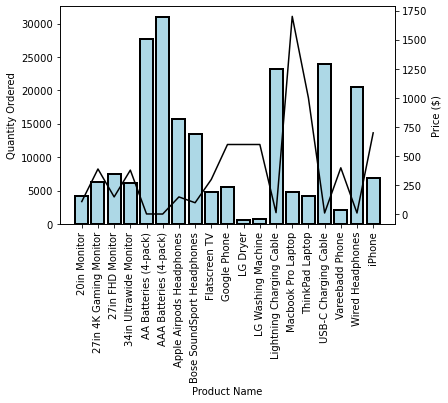

In [145]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_ordered,color='lightblue',edgecolor='black',lw=2)
ax2.plot(products, prices, color='black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price ($)')
ax1.set_xticklabels(products, rotation='vertical',size=10);

#### Answer 5: The product : 'AAA Batteries (4-Pack)' is sold the most as it is the cheapest of all the products. As we see in the above graph, as the price increases the order quantity also decreases.

### Thank You!